In [1]:
# things we need for NLP
import nltk
nltk.download('punkt')
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()

import numpy as np
import random

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import utils
from keras import layers

import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gunawf01\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


C:\Users\gunawf01\AppData\Local\Continuum\anaconda3\envs\tfdeeplearning\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# import our chat-bot intents file
import json
with open('intents.json') as json_data:
    intents = json.load(json_data)

In [3]:
words = []
classes = []
documents = []
ignore_words = ['?']
# loop through each sentence in our intents patterns
for intent in intents['intents']:
    for pattern in intent['patterns']:
        # tokenize each word in the sentence
        w = nltk.word_tokenize(pattern)
        # add to our words list
        words.extend(w)
        # add to documents in our corpus
        documents.append((w, intent['tag']))
        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

# stem and lower each word and remove duplicates
words = [stemmer.stem(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

# remove duplicates
classes = sorted(list(set(classes)))

print (len(documents), "documents")
print (len(classes), "classes", classes)
print (len(words), "unique stemmed words", words)

35 documents
11 classes ['daisy', 'flowers', 'goodbye', 'greeting', 'hours', 'noanswer', 'opentoday', 'payments', 'rose', 'thanks', 'tulip']
47 unique stemmed words ["'s", 'a', 'acceiv', 'anyon', 'ar', 'buy', 'bye', 'card', 'cash', 'credit', 'daisy', 'day', 'do', 'flow', 'good', 'goodby', 'hav', 'hello', 'help', 'hi', 'hour', 'how', 'i', 'is', 'kind', 'lat', 'lik', 'mastercard', 'of', 'on', 'op', 'ros', 'see', 'tak', 'thank', 'that', 'the', 'ther', 'to', 'today', 'tulip', 'want', 'what', 'when', 'would', 'yo', 'you']


In [4]:
# create our training data
training = []
output = []
# create an empty array for our output
output_empty = [0] * len(classes)

# training set, bag of words for each sentence
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # stem each word
    pattern_words = [stemmer.stem(word.lower()) for word in pattern_words]
    # create our bag of words array
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    # output is a '0' for each tag and '1' for current tag
    output_row = list(output_empty)
    #print(classes.index(doc[1]))
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])

In [5]:
# shuffle our features and turn into np.array
random.shuffle(training)
training = np.array(training)

# create train and test lists
train_x = list(training[:,0])
train_y = list(training[:,1])

In [6]:
model = Sequential()
model.add(Dense(8, input_shape=[len(train_x[0],)]))
model.add(Dense(8))
model.add(Dense(8))
model.add(Dense(len(train_y[0]), activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(np.array(train_x), np.array(train_y), epochs=1000, batch_size=8)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 384       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 11)                99        
Total params: 627
Trainable params: 627
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
35/35 [==============================] - 2s 68ms/step - loss: 2.4688 - acc: 0.0286
Epoch 2/1000
35/35 [==============================] - 0s 914us/step - loss: 2.4400 - acc: 0.0857
Epoch 3/1000
35/35 [==============================] - 0s 1ms/step - loss: 2.4196 - 

35/35 [==============================] - 0s 2ms/step - loss: 0.5814 - acc: 0.8857
Epoch 78/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.5634 - acc: 0.8857
Epoch 79/1000
35/35 [==============================] - ETA: 0s - loss: 0.5104 - acc: 1.000 - 0s 1ms/step - loss: 0.5463 - acc: 0.8857
Epoch 80/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.5293 - acc: 0.9143
Epoch 81/1000
35/35 [==============================] - 0s 5ms/step - loss: 0.5115 - acc: 0.9143A: 0s - loss: 0.5344 - acc: 0.91
Epoch 82/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.4962 - acc: 0.9143
Epoch 83/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.4796 - acc: 0.9143
Epoch 84/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.4665 - acc: 0.9143
Epoch 85/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.4516 - acc: 0.9143
Epoch 86/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.438

35/35 [==============================] - 0s 2ms/step - loss: 0.0895 - acc: 0.9714
Epoch 160/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.0882 - acc: 0.9714
Epoch 161/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.0870 - acc: 0.9714
Epoch 162/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.0856 - acc: 0.9714
Epoch 163/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.0846 - acc: 0.9714
Epoch 164/1000
35/35 [==============================] - 0s 3ms/step - loss: 0.0833 - acc: 0.9714A: 0s - loss: 0.0872 - acc: 0.968
Epoch 165/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.0820 - acc: 0.9714
Epoch 166/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.0810 - acc: 0.9714
Epoch 167/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.0797 - acc: 0.9714
Epoch 168/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.0787 - acc: 0.9714
Epoch 169/10

C:\Users\gunawf01\AppData\Local\Continuum\anaconda3\envs\tfdeeplearning\lib\site-packages\keras\callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104076). Check your callbacks.
  % delta_t_median)


35/35 [==============================] - 0s 2ms/step - loss: 0.0298 - acc: 1.0000
Epoch 233/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.0293 - acc: 1.0000
Epoch 234/1000
35/35 [==============================] - ETA: 0s - loss: 0.0129 - acc: 1.000 - 0s 2ms/step - loss: 0.0290 - acc: 1.0000
Epoch 235/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.0286 - acc: 1.0000
Epoch 236/1000
35/35 [==============================] - 0s 3ms/step - loss: 0.0281 - acc: 1.0000
Epoch 237/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.0276 - acc: 1.0000
Epoch 238/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.0272 - acc: 1.0000
Epoch 239/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.0267 - acc: 1.0000
Epoch 240/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.0264 - acc: 1.0000
Epoch 241/1000
35/35 [==============================] - 0s 3ms/step - loss: 0.0259 - acc: 1.0000
Epoch 2

35/35 [==============================] - 0s 914us/step - loss: 0.0089 - acc: 1.0000
Epoch 316/1000
35/35 [==============================] - 0s 800us/step - loss: 0.0088 - acc: 1.0000
Epoch 317/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.0087 - acc: 1.0000
Epoch 318/1000
35/35 [==============================] - 0s 914us/step - loss: 0.0086 - acc: 1.0000
Epoch 319/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.0084 - acc: 1.0000
Epoch 320/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.0084 - acc: 1.0000
Epoch 321/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.0082 - acc: 1.0000
Epoch 322/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.0081 - acc: 1.0000
Epoch 323/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.0080 - acc: 1.0000
Epoch 324/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.0079 - acc: 1.0000
Epoch 325/1000
35/35 [=================

35/35 [==============================] - 0s 1ms/step - loss: 0.0038 - acc: 1.0000
Epoch 399/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.0037 - acc: 1.0000
Epoch 400/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.0037 - acc: 1.0000
Epoch 401/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.0037 - acc: 1.0000
Epoch 402/1000
35/35 [==============================] - ETA: 0s - loss: 0.0020 - acc: 1.000 - 0s 1ms/step - loss: 0.0036 - acc: 1.0000
Epoch 403/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.0036 - acc: 1.0000
Epoch 404/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.0036 - acc: 1.0000
Epoch 405/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.0036 - acc: 1.0000
Epoch 406/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.0035 - acc: 1.0000
Epoch 407/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.0035 - acc: 1.0000
Epoch 4

35/35 [==============================] - 0s 2ms/step - loss: 0.0020 - acc: 1.0000
Epoch 482/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.0020 - acc: 1.0000
Epoch 483/1000
35/35 [==============================] - ETA: 0s - loss: 9.7107e-04 - acc: 1.000 - 0s 779us/step - loss: 0.0019 - acc: 1.0000
Epoch 484/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.0019 - acc: 1.0000
Epoch 485/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.0019 - acc: 1.0000
Epoch 486/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.0019 - acc: 1.0000
Epoch 487/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.0019 - acc: 1.0000
Epoch 488/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.0019 - acc: 1.0000
Epoch 489/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.0019 - acc: 1.0000
Epoch 490/1000
35/35 [==============================] - 0s 3ms/step - loss: 0.0019 - acc: 1.0000
E

C:\Users\gunawf01\AppData\Local\Continuum\anaconda3\envs\tfdeeplearning\lib\site-packages\keras\callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100004). Check your callbacks.
  % delta_t_median)


35/35 [==============================] - 0s 5ms/step - loss: 0.0016 - acc: 1.0000
Epoch 511/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.0016 - acc: 1.0000
Epoch 512/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.0016 - acc: 1.0000
Epoch 513/1000
35/35 [==============================] - 0s 3ms/step - loss: 0.0016 - acc: 1.0000
Epoch 514/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.0016 - acc: 1.0000
Epoch 515/1000
35/35 [==============================] - 0s 1ms/step - loss: 0.0016 - acc: 1.0000
Epoch 516/1000
35/35 [==============================] - 0s 3ms/step - loss: 0.0016 - acc: 1.0000
Epoch 517/1000
35/35 [==============================] - 0s 4ms/step - loss: 0.0016 - acc: 1.0000
Epoch 518/1000
35/35 [==============================] - 0s 4ms/step - loss: 0.0016 - acc: 1.0000
Epoch 519/1000
35/35 [==============================] - 0s 5ms/step - loss: 0.0015 - acc: 1.0000
Epoch 520/1000
35/35 [=======================

35/35 [==============================] - 0s 2ms/step - loss: 0.0010 - acc: 1.0000
Epoch 594/1000
35/35 [==============================] - 0s 3ms/step - loss: 0.0010 - acc: 1.0000
Epoch 595/1000
35/35 [==============================] - 0s 2ms/step - loss: 0.0010 - acc: 1.0000
Epoch 596/1000
35/35 [==============================] - 0s 1ms/step - loss: 9.9848e-04 - acc: 1.0000
Epoch 597/1000
35/35 [==============================] - 0s 1ms/step - loss: 9.9314e-04 - acc: 1.0000
Epoch 598/1000
35/35 [==============================] - 0s 3ms/step - loss: 9.8577e-04 - acc: 1.0000
Epoch 599/1000
35/35 [==============================] - 0s 3ms/step - loss: 9.7940e-04 - acc: 1.0000
Epoch 600/1000
35/35 [==============================] - 0s 3ms/step - loss: 9.7500e-04 - acc: 1.0000
Epoch 601/1000
35/35 [==============================] - 0s 3ms/step - loss: 9.6854e-04 - acc: 1.0000
Epoch 602/1000
35/35 [==============================] - 0s 3ms/step - loss: 9.6312e-04 - acc: 1.0000
Epoch 603/1000
35

35/35 [==============================] - 0s 3ms/step - loss: 6.6498e-04 - acc: 1.0000
Epoch 674/1000
35/35 [==============================] - 0s 3ms/step - loss: 6.6180e-04 - acc: 1.0000
Epoch 675/1000
35/35 [==============================] - 0s 3ms/step - loss: 6.5812e-04 - acc: 1.0000
Epoch 676/1000
35/35 [==============================] - 0s 1ms/step - loss: 6.5484e-04 - acc: 1.0000
Epoch 677/1000
35/35 [==============================] - 0s 3ms/step - loss: 6.5084e-04 - acc: 1.0000
Epoch 678/1000
35/35 [==============================] - 0s 3ms/step - loss: 6.4868e-04 - acc: 1.0000
Epoch 679/1000
35/35 [==============================] - 0s 4ms/step - loss: 6.4379e-04 - acc: 1.0000
Epoch 680/1000
35/35 [==============================] - 0s 3ms/step - loss: 6.4097e-04 - acc: 1.0000
Epoch 681/1000
35/35 [==============================] - 0s 2ms/step - loss: 6.3805e-04 - acc: 1.0000
Epoch 682/1000
35/35 [==============================] - 0s 2ms/step - loss: 6.3496e-04 - acc: 1.0000
Epoch

35/35 [==============================] - 0s 1ms/step - loss: 4.5876e-04 - acc: 1.0000
Epoch 754/1000
35/35 [==============================] - 0s 3ms/step - loss: 4.5662e-04 - acc: 1.0000
Epoch 755/1000
35/35 [==============================] - 0s 3ms/step - loss: 4.5483e-04 - acc: 1.0000
Epoch 756/1000
35/35 [==============================] - 0s 3ms/step - loss: 4.5291e-04 - acc: 1.0000
Epoch 757/1000
35/35 [==============================] - 0s 1ms/step - loss: 4.5140e-04 - acc: 1.0000
Epoch 758/1000
35/35 [==============================] - 0s 1ms/step - loss: 4.4916e-04 - acc: 1.0000
Epoch 759/1000
35/35 [==============================] - 0s 2ms/step - loss: 4.4754e-04 - acc: 1.0000
Epoch 760/1000
35/35 [==============================] - 0s 3ms/step - loss: 4.4536e-04 - acc: 1.0000
Epoch 761/1000
35/35 [==============================] - 0s 3ms/step - loss: 4.4404e-04 - acc: 1.0000
Epoch 762/1000
35/35 [==============================] - 0s 1ms/step - loss: 4.4138e-04 - acc: 1.0000
Epoch

C:\Users\gunawf01\AppData\Local\Continuum\anaconda3\envs\tfdeeplearning\lib\site-packages\keras\callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104009). Check your callbacks.
  % delta_t_median)


Epoch 808/1000
35/35 [==============================] - 0s 3ms/step - loss: 3.6478e-04 - acc: 1.0000
Epoch 809/1000
35/35 [==============================] - 0s 1ms/step - loss: 3.6330e-04 - acc: 1.0000
Epoch 810/1000
35/35 [==============================] - 0s 3ms/step - loss: 3.6200e-04 - acc: 1.0000
Epoch 811/1000
35/35 [==============================] - 0s 2ms/step - loss: 3.5979e-04 - acc: 1.0000
Epoch 812/1000
35/35 [==============================] - 0s 3ms/step - loss: 3.5883e-04 - acc: 1.0000
Epoch 813/1000
35/35 [==============================] - 0s 2ms/step - loss: 3.5689e-04 - acc: 1.0000
Epoch 814/1000
35/35 [==============================] - 0s 2ms/step - loss: 3.5488e-04 - acc: 1.0000
Epoch 815/1000
35/35 [==============================] - 0s 4ms/step - loss: 3.5350e-04 - acc: 1.0000
Epoch 816/1000
35/35 [==============================] - 0s 3ms/step - loss: 3.5196e-04 - acc: 1.0000
Epoch 817/1000
35/35 [==============================] - 0s 4ms/step - loss: 3.5066e-04 - ac

35/35 [==============================] - 0s 2ms/step - loss: 2.6544e-04 - acc: 1.0000
Epoch 889/1000
35/35 [==============================] - 0s 1ms/step - loss: 2.6468e-04 - acc: 1.0000
Epoch 890/1000
35/35 [==============================] - 0s 1ms/step - loss: 2.6342e-04 - acc: 1.0000
Epoch 891/1000
35/35 [==============================] - 0s 2ms/step - loss: 2.6242e-04 - acc: 1.0000
Epoch 892/1000
35/35 [==============================] - 0s 1ms/step - loss: 2.6134e-04 - acc: 1.0000
Epoch 893/1000
35/35 [==============================] - 0s 2ms/step - loss: 2.6046e-04 - acc: 1.0000
Epoch 894/1000
35/35 [==============================] - 0s 2ms/step - loss: 2.5949e-04 - acc: 1.0000
Epoch 895/1000
35/35 [==============================] - 0s 1ms/step - loss: 2.5845e-04 - acc: 1.0000
Epoch 896/1000
35/35 [==============================] - 0s 2ms/step - loss: 2.5749e-04 - acc: 1.0000
Epoch 897/1000
35/35 [==============================] - 0s 3ms/step - loss: 2.5654e-04 - acc: 1.0000
Epoch

35/35 [==============================] - 0s 1ms/step - loss: 1.9770e-04 - acc: 1.0000
Epoch 969/1000
35/35 [==============================] - 0s 2ms/step - loss: 1.9703e-04 - acc: 1.0000
Epoch 970/1000
35/35 [==============================] - 0s 4ms/step - loss: 1.9617e-04 - acc: 1.0000
Epoch 971/1000
35/35 [==============================] - 0s 2ms/step - loss: 1.9550e-04 - acc: 1.0000A: 0s - loss: 2.0548e-04 - acc: 1.000
Epoch 972/1000
35/35 [==============================] - 0s 3ms/step - loss: 1.9493e-04 - acc: 1.0000
Epoch 973/1000
35/35 [==============================] - 0s 2ms/step - loss: 1.9421e-04 - acc: 1.0000
Epoch 974/1000
35/35 [==============================] - 0s 1ms/step - loss: 1.9349e-04 - acc: 1.0000
Epoch 975/1000
35/35 [==============================] - 0s 2ms/step - loss: 1.9280e-04 - acc: 1.0000
Epoch 976/1000
35/35 [==============================] - 0s 2ms/step - loss: 1.9213e-04 - acc: 1.0000
Epoch 977/1000
35/35 [==============================] - 0s 3ms/step -

In [7]:
model.save('model_ChatBot.h5')

In [8]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc'])

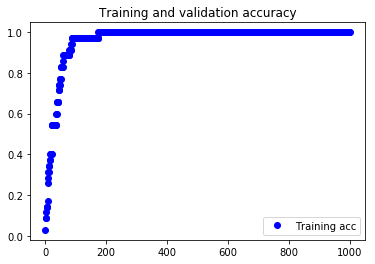

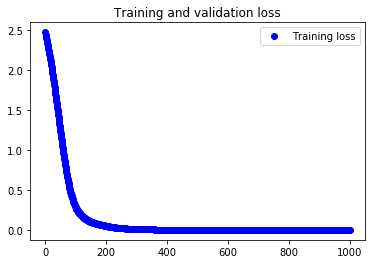

In [9]:
acc = history.history['acc']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [10]:
def clean_up_sentence(sentence):
    # tokenize the pattern
    sentence_words = nltk.word_tokenize(sentence)
    # stem each word
    sentence_words = [stemmer.stem(word.lower()) for word in sentence_words]
    return sentence_words

# return bag of words array: 0 or 1 for each word in the bag that exists in the sentence
def bow(sentence, words, show_details=False):
    # tokenize the pattern
    sentence_words = clean_up_sentence(sentence)
    # bag of words
    bag = [0]*len(words)  
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s: 
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)

    return(np.array(bag))

In [11]:
p = bow("I would like to buy flowers", words)
print (p)
print (classes)

[0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0]
['daisy', 'flowers', 'goodbye', 'greeting', 'hours', 'noanswer', 'opentoday', 'payments', 'rose', 'thanks', 'tulip']


In [13]:
d = len(p)
f = len(documents)-2
a = np.zeros([f, d])

In [14]:
tot = np.vstack((p,a))

In [15]:
prediction = model.predict(tot)
predicted_index = np.argmax(prediction)
predicted_index

1